In [11]:
# from google.colab import files
# uploaded = files.upload()

import io
data = io.BytesIO(uploaded['kmeas_clustering_data.csv'])  

import pandas as pd   
df = pd.read_csv(data)

df.head()

,Customer_No,Dependent,Age_rounded,Income_rounded_Annual_USD,Household_exp,Comm_exp,Buying_Potential
0,C1001,6,40,70000,3000,200,150
1,C1002,2,30,10000,4000,500,200
2,C1003,7,20,20000,4000,100,150
3,C1004,4,60,40000,5000,300,300
4,C1005,1,30,20000,2000,600,200


In [12]:
data = df.drop(['Customer_No'],axis =1)
data.head()

,Dependent,Age_rounded,Income_rounded_Annual_USD,Household_exp,Comm_exp,Buying_Potential
0,6,40,70000,3000,200,150
1,2,30,10000,4000,500,200
2,7,20,20000,4000,100,150
3,4,60,40000,5000,300,300
4,1,30,20000,2000,600,200


In [13]:
X=data.iloc[:, [0,1,2,3,4,5]].values

In [14]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.metrics import silhouette_score

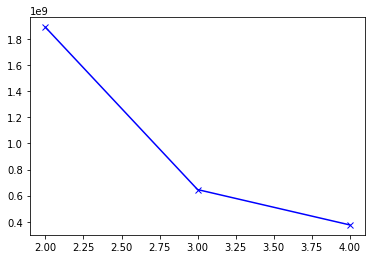

In [15]:
## Find out number clusters exist in the data
Sum_of_squared_distances = []
K = range(2,5)
for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(data)
    Sum_of_squared_distances.append(km.inertia_)
    
plt.plot(K, Sum_of_squared_distances, 'bx-')
plt.show()

In [20]:
## Train the model and save the output cluster labels to a csv file
model = KMeans(n_clusters=3, random_state=42) 
data_kmeans = model.fit(X)
data['cluster_labels'] = data_kmeans.labels_

In [21]:
data.head()

,Dependent,Age_rounded,Income_rounded_Annual_USD,Household_exp,Comm_exp,Buying_Potential,cluster_labels
0,6,40,70000,3000,200,150,1
1,2,30,10000,4000,500,200,0
2,7,20,20000,4000,100,150,0
3,4,60,40000,5000,300,300,2
4,1,30,20000,2000,600,200,0


In [22]:
## Silhoute coefficient for clusters
score = silhouette_score(data, model.labels_, metric='euclidean')
print('Silhouetter Score: %.3f' % score)

Silhouetter Score: 0.631


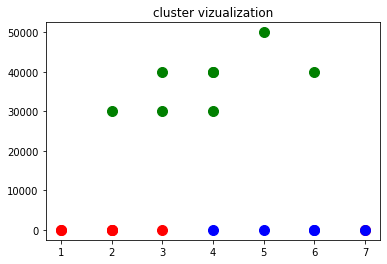

In [25]:
y_kmeans = data_kmeans.fit_predict(X)

import matplotlib.pyplot as plt
plt.title("cluster vizualization")

plt.scatter(X[y_kmeans==0, 0], X[y_kmeans==0, 1], s=100, c='red', label ='Cluster 1')
plt.scatter(X[y_kmeans==1, 0], X[y_kmeans==1, 1], s=100, c='blue', label ='Cluster 2')
plt.scatter(X[y_kmeans==2, 0], X[y_kmeans==2, 2], s=100, c='green', label ='Cluster 3')

In [27]:
cluster1 = data[data["cluster_labels"] == 0]
cluster1.describe()

,Dependent,Age_rounded,Income_rounded_Annual_USD,Household_exp,Comm_exp,Buying_Potential,cluster_labels
count,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.0
mean,2.571429,32.857143,17142.857143,4000.000000,457.142857,164.285714,0.0
std,2.070197,17.043362,4879.500365,1290.994449,190.237946,37.796447,0.0
min,1.000000,20.000000,10000.000000,2000.000000,100.000000,100.000000,0.0
25%,1.500000,25.000000,15000.000000,3500.000000,400.000000,150.000000,0.0
50%,2.000000,30.000000,20000.000000,4000.000000,500.000000,150.000000,0.0
75%,2.500000,30.000000,20000.000000,4500.000000,550.000000,200.000000,0.0
max,7.000000,70.000000,20000.000000,6000.000000,700.000000,200.000000,0.0


In [28]:
cluster2 = data[data["cluster_labels"] == 1]
cluster2.describe()

,Dependent,Age_rounded,Income_rounded_Annual_USD,Household_exp,Comm_exp,Buying_Potential,cluster_labels
count,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.0
mean,5.600000,36.000000,66000.000000,3000.000000,220.000000,200.000000,1.0
std,1.140175,5.477226,5477.225575,707.106781,83.666003,35.355339,0.0
min,4.000000,30.000000,60000.000000,2000.000000,100.000000,150.000000,1.0
25%,5.000000,30.000000,60000.000000,3000.000000,200.000000,200.000000,1.0
50%,6.000000,40.000000,70000.000000,3000.000000,200.000000,200.000000,1.0
75%,6.000000,40.000000,70000.000000,3000.000000,300.000000,200.000000,1.0
max,7.000000,40.000000,70000.000000,4000.000000,300.000000,250.000000,1.0


In [29]:
cluster3 = data[data["cluster_labels"] == 2]
cluster3.describe()

,Dependent,Age_rounded,Income_rounded_Annual_USD,Household_exp,Comm_exp,Buying_Potential,cluster_labels
count,8.000000,8.00000,8.000000,8.000000,8.000000,8.000000,8.0
mean,3.875000,51.25000,37500.000000,4875.000000,325.000000,275.000000,2.0
std,1.246423,8.34523,7071.067812,1726.888201,158.113883,80.178373,0.0
min,2.000000,40.00000,30000.000000,2000.000000,100.000000,150.000000,2.0
25%,3.000000,47.50000,30000.000000,3750.000000,200.000000,200.000000,2.0
50%,4.000000,50.00000,40000.000000,5500.000000,350.000000,300.000000,2.0
75%,4.250000,60.00000,40000.000000,6000.000000,400.000000,350.000000,2.0
max,6.000000,60.00000,50000.000000,7000.000000,600.000000,350.000000,2.0
